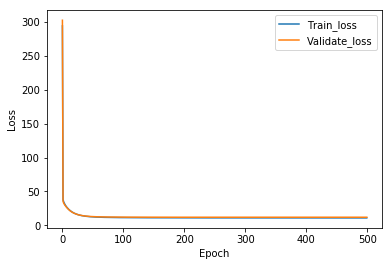

In [23]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def get_data():
    data = load_svmlight_file('./Housing.txt') 
    return data[0],data[1]

def  split_data(x,y):
    X_train, X_validate, Y_train, Y_validate = train_test_split(x,y,test_size=0.2)
    return X_train, X_validate, Y_train, Y_validate

# compute loss
def loss(w,b,data,label,num):
    b = np.ones((num,1))*b
    totalLoss = (label-data*np.transpose(w)-b)**2
    totalLoss = np.sum(totalLoss/2,axis= 0)
    totalLoss = totalLoss / float(data.shape[0])
    return totalLoss

# compute gradient and optimizer w and b
def optimizer(data,label,w_current,b_current,learning_rate,num):
    #w_gradient应该是样本数*维度数
    b = np.ones((num,1))*b_current
    w_gradient = -1/num * (np.transpose(label-data*np.transpose(w_current)-b))*data
    #w_gradient = np.sum(w_gradient,axis=0)
    b_gradient = -1/num *(label-data*np.transpose(w_current)-b)
    b_gradient = np.sum(b_gradient,axis=0)
    new_b = b_current - (learning_rate * b_gradient)
    new_w = w_current - (learning_rate * w_gradient)
    return new_w,new_b


# read and split data
X,Y = get_data()
Y = Y.reshape((len(Y),1))
X_train, X_validate, Y_train, Y_validate = split_data(X,Y)

# some related numbers
features_num = X.shape[1]
train_num = Y_train.shape[0]
validate_num = Y_validate.shape[0]

train_loss = []
validate_loss = []

# initialize w and other parameters
w = np.zeros((1,features_num))
b = 0
learning_rate = 0.2
iterations = 500

# record loss of train and validate date
for i in range(iterations):
    train_loss.append(loss(w,b,X_train,Y_train,train_num))
    validate_loss.append(loss(w,b,X_validate,Y_validate,validate_num))
    w,b = optimizer(X_train,Y_train,w,b,learning_rate,train_num)


# plot
fig, ax = plt.subplots()
train_loss_line = ax.plot(range(iterations),train_loss,label='Train_loss')
validate_loss_line = ax.plot(range(iterations),validate_loss,label='Validate_loss')

plt.legend()
ax.set(xlabel='Epoch',ylabel='Loss')
plt.show()
  